In [1]:
import pandas as pd

dataset=pd.read_csv(r'D:\Data_Science\DL_Workshop\Rewatch\Day 03\iris.csv').values
print(dataset,dataset.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Data_Science\\DL_Workshop\\Rewatch\\Day 03\\iris.csv'

In [ ]:
data=dataset[:,0:4]
target=dataset[:,4]

print(data.shape,target.shape)

In [ ]:
print(data)
print(target)

# Categorical Encoding

In [ ]:
from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

print(target[:10])

In [ ]:
print(new_target[:10])

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
print(train_data,train_data.shape)

In [ ]:
print(test_data,test_data.shape)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()   # empty sequential type neural network

model.add(Dense(64,input_dim=4,activation='relu'))  # 1st Hidden Layer
#model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(32,activation='relu')) #2nd Hidden Layer
model.add(Dense(3,activation='softmax')) #output layer

model.compile(loss='categorical_crossentropy',optimizer='adaGrad',metrics=['accuracy'])
model.summary()

In [ ]:
for layer in model.layers:
    
    print('================================',layer.name,'================================')
    
    parameters=layer.get_weights()
    print(parameters)

In [2]:
# training the model
model.fit(train_data,train_target,epochs=1000,validation_split=0.1,batch_size=1)
#model.fit(train_data,train_target,epochs=1000,validation_data=(test_data,test_target),batch_size=1)

NameError: name 'model' is not defined

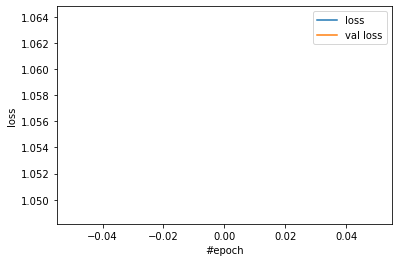

In [16]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'],label='loss')
plt.plot(model.history.history['val_loss'],label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
plt.show()

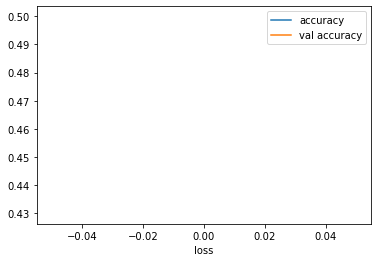

In [13]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.show()

In [ ]:
import numpy as np

test_data_1=np.array([5.3,2.3,4.7,2.1]).reshape(1,-1)

predicted_target_1=model.predict(test_data_1)
print(predicted_target_1)

In [ ]:
label=np.argmax(predicted_target_1)
print(label)

In [ ]:
predicted_target=model.predict(test_data)
print(predicted_target)
print(np.argmax(predicted_target,axis=1))

In [ ]:
print(test_target)
print(np.argmax(test_target,axis=1))

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))
print('accuracy:',acc)

In [ ]:
model.evaluate(test_data,test_target)         #argmax will be automatically added  results= (loss,accuracy)

In [ ]:
model.save_weights('FFNN-iris.h5')

In [ ]:
model.save('FFNN-iris.model')